In [1]:
u1 = "http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/Z.zip"
u2 = "http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/N.zip"
u3 = "http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/O.zip"
u4 = "http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/F.zip"
u5 = "http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/S.zip"

In [2]:
import wget

In [3]:
wget.download(u1)
wget.download(u2)
wget.download(u3)
wget.download(u4)
wget.download(u5)

'S.zip'

In [4]:
! mkdir A2 
! mkdir B2
! mkdir C2
! mkdir D2
! mkdir E2

In [5]:
import zipfile

In [6]:
with zipfile.ZipFile("Z.zip", "r") as z_ref:
    z_ref.extractall(r"A2")
with zipfile.ZipFile("N.zip", "r") as n_ref:
    n_ref.extractall(r"B2")
with zipfile.ZipFile("O.zip", "r") as o_ref:
    o_ref.extractall(r"C2")
with zipfile.ZipFile("F.zip", "r") as f_ref:
    f_ref.extractall(r"D2")
with zipfile.ZipFile("S.zip", "r") as s_ref:
    s_ref.extractall(r"E2")

In [7]:
import numpy as np
import os
from scipy.signal import butter, filtfilt


pass_band = [0.5*2/173, 40*2/173]
b, a = butter(1, pass_band, 'bandpass')

A_files = [os.path.join(r"A2", path) for path in os.listdir(r"A2")]

A_signals = []

for signal in A_files:
  signal = np.loadtxt(signal)
  signal = filtfilt(b, a, signal)
  A_signals.append(signal)

A_signals = np.array(A_signals)

In [8]:
B_files = [os.path.join(r"B2", path) for path in os.listdir(r"B2")]

B_signals = []

for signal in B_files:
  signal = np.loadtxt(signal)
  signal = filtfilt(b, a, signal)
  B_signals.append(signal)

B_signals = np.array(B_signals)

In [9]:
C_files = [os.path.join(r"C2", path) for path in os.listdir(r"C2")]

C_signals = []


for signal in C_files:
  signal = np.loadtxt(signal)
  signal = filtfilt(b, a, signal)
  C_signals.append(signal)

C_signals = np.array(C_signals)

In [10]:
D_files = [os.path.join(r"D2", path) for path in os.listdir(r"D2")]

D_signals = []


for signal in D_files:
  signal = np.loadtxt(signal)
  signal = filtfilt(b, a, signal)
  D_signals.append(signal)

D_signals = np.array(D_signals)

In [11]:
E_files = [os.path.join(r"E2", path) for path in os.listdir(r"E2")]

E_signals = []


for signal in E_files:
  signal = np.loadtxt(signal)
  signal = filtfilt(b, a, signal)
  E_signals.append(signal)

E_signals = np.array(E_signals)

In [12]:
# 1: Normal EEG Signals
# 2: Seizure EEG Signals
import numpy as np
A_labels = np.ones(len(A_signals)) * 1
B_labels = np.ones(len(B_signals)) * 1

C_labels = np.ones(len(C_signals)) * 1
D_labels = np.ones(len(D_signals)) * 1

E_labels = np.ones(len(E_signals)) * 2

X = np.concatenate((A_signals, B_signals, C_signals), axis=0)
Y = np.concatenate((A_labels, B_labels, C_labels), axis=0)
X2 = E_signals
Y2 = E_labels

from sklearn.preprocessing import LabelBinarizer

Y = LabelBinarizer().fit_transform(Y)
Y2 = LabelBinarizer().fit_transform(Y2)
print(X.shape)
print(Y.shape)

(300, 4097)
(300, 1)


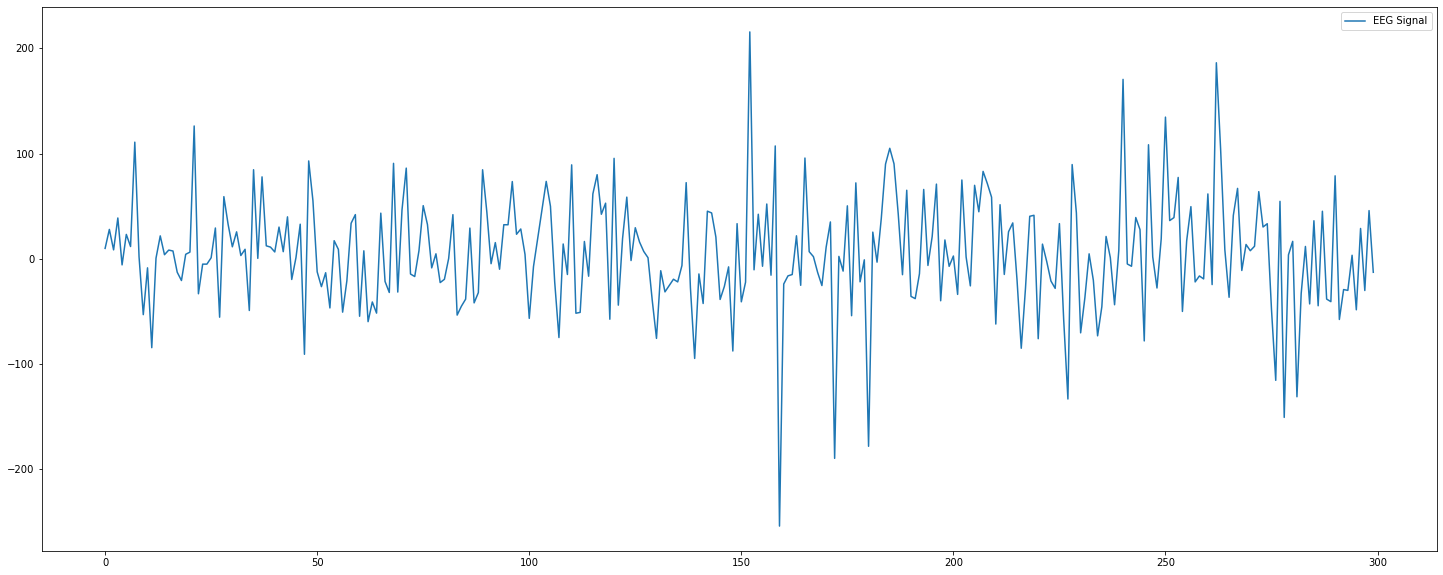

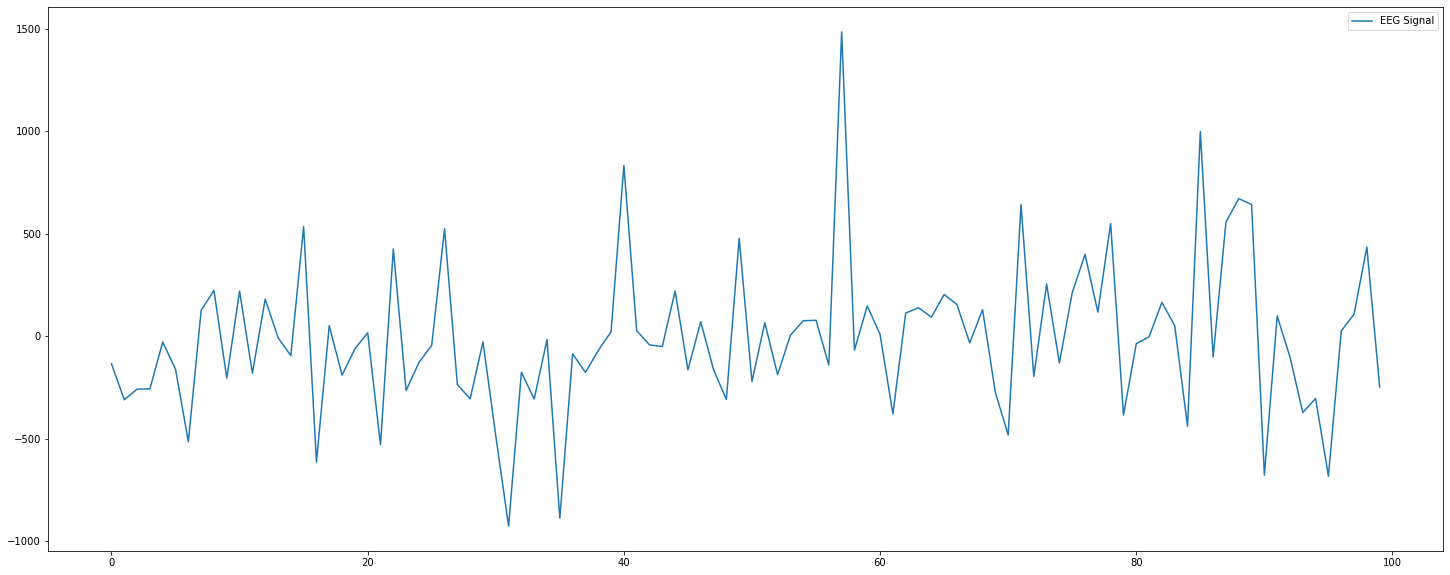

In [13]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(25, 10))
plt.plot(X[0:499, 50],  label = 'EEG Signal')
plt.legend()

plt.figure(figsize=(25, 10))
plt.plot(X2[0:150,5],  label = 'EEG Signal')
plt.legend()

In [14]:
X = X[:, 0:868].reshape(-1, 868, 1)
X2 = X2[:, 0:868].reshape(-1, 868, 1)
print(X.shape)
print(Y.shape)
print(X2.shape)
print(Y2.shape)

(300, 868, 1)
(300, 1)
(100, 868, 1)
(100, 1)


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X.reshape(-1, 868)).reshape(-1, 868, 1)
X2 = scaler.fit_transform(X2.reshape(-1, 868)).reshape(-1, 868, 1)
print(X.shape)
print(X2.shape)
print(X[1].shape)

(300, 868, 1)
(100, 868, 1)
(868, 1)


In [119]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, BatchNormalization
from tensorflow.keras.layers import Flatten, Dense, Reshape, Conv1D, Dropout
from tensorflow.keras.layers import AveragePooling1D, UpSampling1D, Activation
from tensorflow.keras.layers import ZeroPadding1D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

inputs = Input(shape=(868, 1))
# ENCODER
# part 1
x = Conv1D(32, 7, padding='same', strides=1)(inputs)
x = Activation('relu')(x)
x = MaxPooling1D(pool_size=4)(x)
x = BatchNormalization(axis=-1, momentum=0.8)(x)
x = Conv1D(32, 7, padding='same', strides=1)(x)
x = Activation('relu')(x)
x = MaxPooling1D(pool_size=4, name='encoder_out')(x)

# DECODER
# part 2
x = Conv1D(32, 7, padding='same', strides=1)(x)
x = Activation('relu')(x)
x = UpSampling1D(4)(x)
x = BatchNormalization(axis=-1, momentum=0.8)(x)

x = Conv1D(32, 7, padding='same', strides=1)(x)
x = Activation('relu')(x)
x = UpSampling1D(4)(x)
x = BatchNormalization(axis=-1, momentum=0.8)(x)

x = ZeroPadding1D(padding=2)(x)
x = Conv1D(1, 7, padding='same', strides=1)(x)
x = Activation('tanh')(x)

model= Model(inputs, x)


You should consider upgrading via the '/Users/jcervan/opt/anaconda3/bin/python3 -m pip install --upgrade pip' command.


In [120]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42,
                                                    shuffle=True,
                                                    stratify=np.concatenate((A_labels, B_labels, C_labels), axis=0))
print(X_train.shape)
print(X_test.shape)

(210, 868, 1)
(90, 868, 1)
(100, 868, 1)


In [121]:
model.compile(loss='mse',
              optimizer='adadelta')
history = model.fit(X_train, X_train, validation_data=(X_test, X_test),
                    epochs=1000, batch_size=40)

Epoch 1/1000
6/6 [==============================] - 5s 114ms/step - loss: 0.5000 - val_loss: 0.1478
Epoch 2/1000
6/6 [==============================] - 0s 72ms/step - loss: 0.4993 - val_loss: 0.2279
Epoch 3/1000
6/6 [==============================] - 0s 70ms/step - loss: 0.4979 - val_loss: 0.2800
Epoch 4/1000
6/6 [==============================] - 0s 69ms/step - loss: 0.4984 - val_loss: 0.3739
Epoch 5/1000
6/6 [==============================] - 0s 70ms/step - loss: 0.4962 - val_loss: 0.4444
Epoch 6/1000
6/6 [==============================] - 0s 70ms/step - loss: 0.4957 - val_loss: 0.4824
Epoch 7/1000
6/6 [==============================] - 0s 66ms/step - loss: 0.4939 - val_loss: 0.4952
Epoch 8/1000
6/6 [==============================] - 0s 72ms/step - loss: 0.4931 - val_loss: 0.4904
Epoch 9/1000
6/6 [==============================] - 0s 70ms/step - loss: 0.4936 - val_loss: 0.4984
Epoch 10/1000
6/6 [==============================] - 0s 72ms/step - loss: 0.4936 - val_loss: 0.4947
Epoch 11

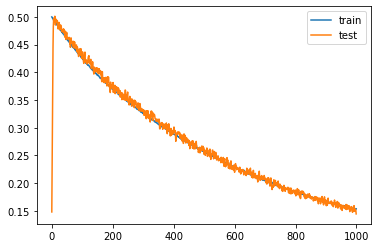

In [122]:
import matplotlib.pyplot as plt

# plot loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [123]:
def mae_loss(dataset):
    
    predicted = model.predict(dataset)
    predicted = predicted.reshape(predicted.shape[0], predicted.shape[1])
    dataset = dataset.reshape(dataset.shape[0],dataset.shape[1])
    
    
    scored = pd.DataFrame()

    scored['Pred_loss_mae'] = np.mean(np.abs(predicted - dataset), axis = 1)

    pred_losses = scored.to_numpy()
    
    return pred_losses

In [124]:
def mse_loss(dataset):
    
    predicted = model.predict(dataset)
    predicted = predicted.reshape(predicted.shape[0], predicted.shape[1])
    dataset = dataset.reshape(dataset.shape[0],dataset.shape[1])
    
    
    scored = pd.DataFrame()

    scored['Pred_loss_mae'] = np.mean(np.square(predicted - dataset), axis = 1)

    pred_losses = scored.to_numpy()
    
    return pred_losses

In [150]:
def rmse_loss(dataset):
    
    predicted = model.predict(dataset)
    predicted = predicted.reshape(predicted.shape[0], predicted.shape[1])
    dataset = dataset.reshape(dataset.shape[0],dataset.shape[1])
    
    
    scored = pd.DataFrame()

    scored['Pred_loss_mae'] = np.mean(np.sqrt(np.square(predicted - dataset)), axis = 1)

    pred_losses = scored.to_numpy()
    
    return pred_losses

In [125]:
def results(data_loss, THRESHOLD):
    normal_predictions = sum(l <= THRESHOLD for l in data_loss)
    anomaly_predictions = sum(l > THRESHOLD for l in data_loss)
    
    print(f'normal predictions: {int(normal_predictions)}/{len(data_loss)}')
    print(f'anomaly predictions: {int(anomaly_predictions)}/{len(data_loss)}')

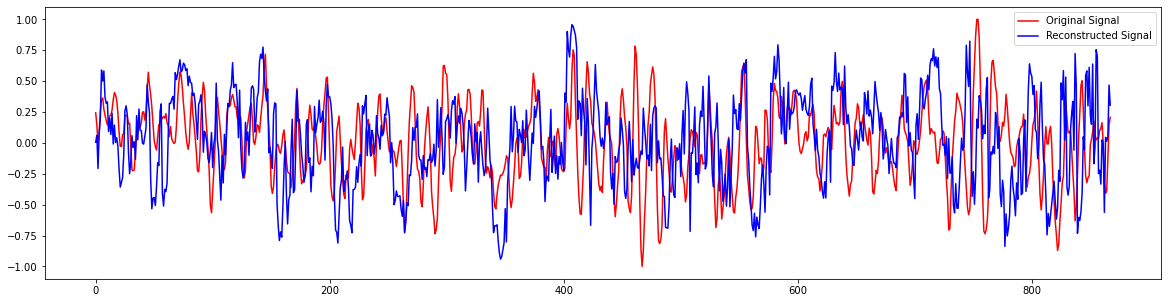

In [130]:
import numpy as np

preds = model.predict(X_test)
plt.figure(figsize=(20, 5))
plt.plot(X_test[0], color='red',label = 'Original Signal')
plt.plot(preds[0], color='blue',  label = 'Reconstructed Signal')
plt.legend()


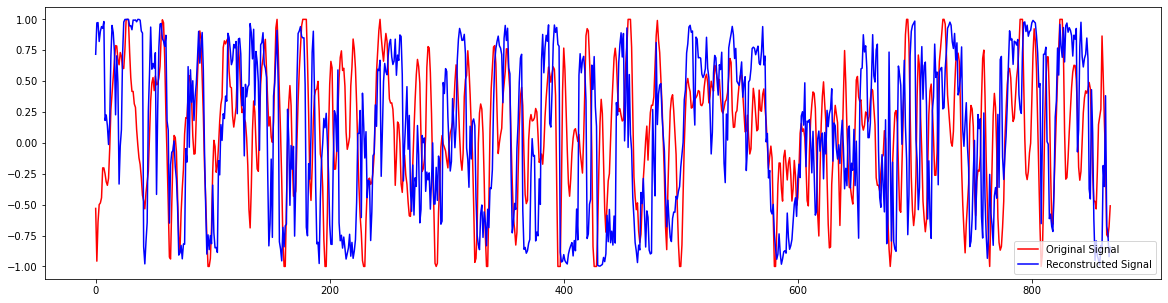

In [180]:
p = model.predict(X2)
plt.figure(figsize=(20, 5))
plt.plot(X2[3], color='red',label = 'Original Signal')
plt.plot(p[3], color='blue',  label = 'Reconstructed Signal')
plt.legend()

/Users/jcervan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


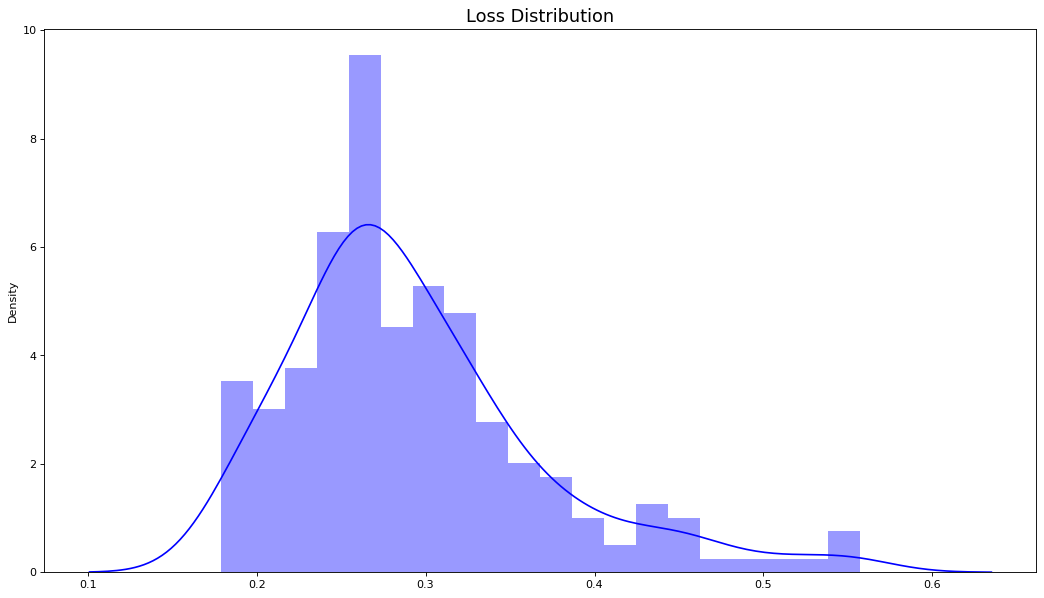

In [162]:
import pandas as pd
Train_l = mae_loss(X_train)
plt.figure(figsize = (16,9), dpi = 80)
plt.title('Loss Distribution', fontsize = 16)
sns.distplot(Train_l, bins = 20, kde=True, color = 'blue');

In [163]:
threshold = .35

In [164]:
results(Train_l,threshold)

normal predictions: 173/210
anomaly predictions: 37/210


/Users/jcervan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


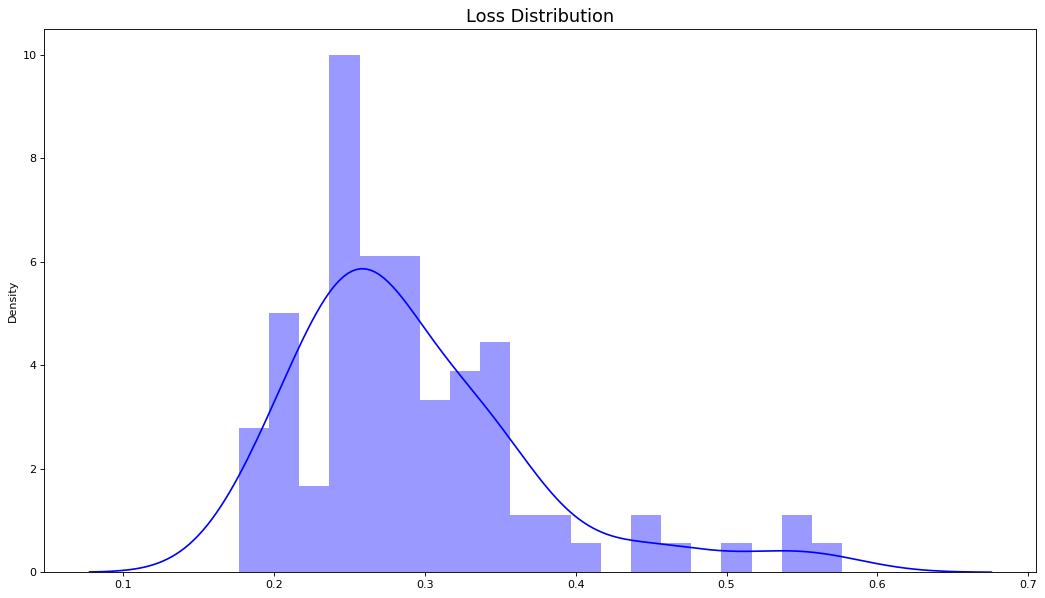

In [165]:
Test_l = mae_loss(X_test)
plt.figure(figsize = (16,9), dpi = 80)
plt.title('Loss Distribution', fontsize = 16)
sns.distplot(Test_l, bins = 20, kde=True, color = 'blue');

In [166]:
results(Test_l,threshold)

normal predictions: 75/90
anomaly predictions: 15/90


/Users/jcervan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


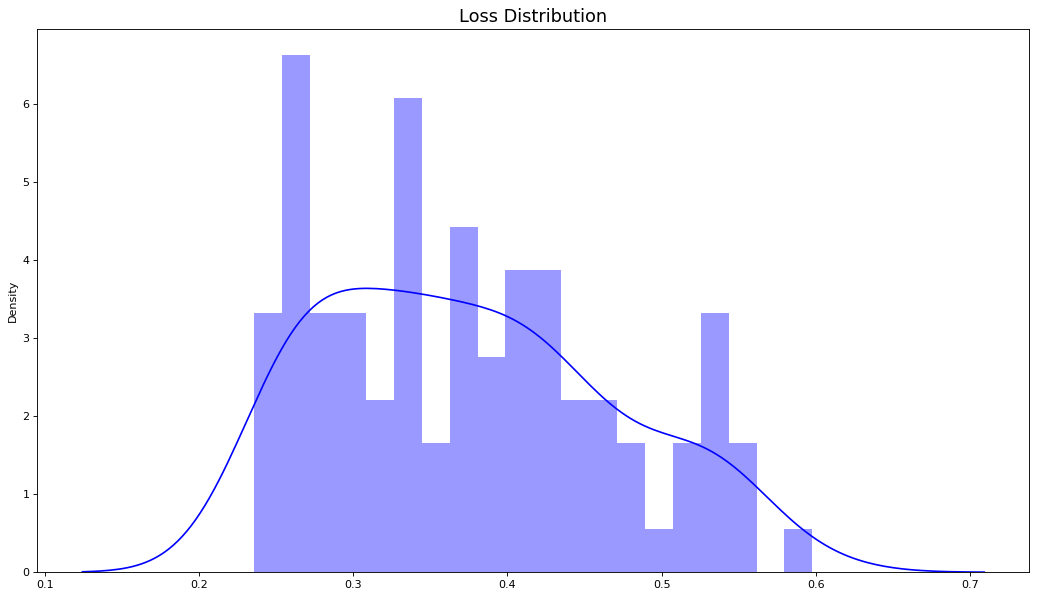

In [167]:
Anom_l = mae_loss(X2)
plt.figure(figsize = (16,9), dpi = 80)
plt.title('Loss Distribution', fontsize = 16)
sns.distplot(Anom_l, bins = 20, kde=True, color = 'blue');

In [168]:
results(Anom_l,threshold)

normal predictions: 47/100
anomaly predictions: 53/100


/Users/jcervan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


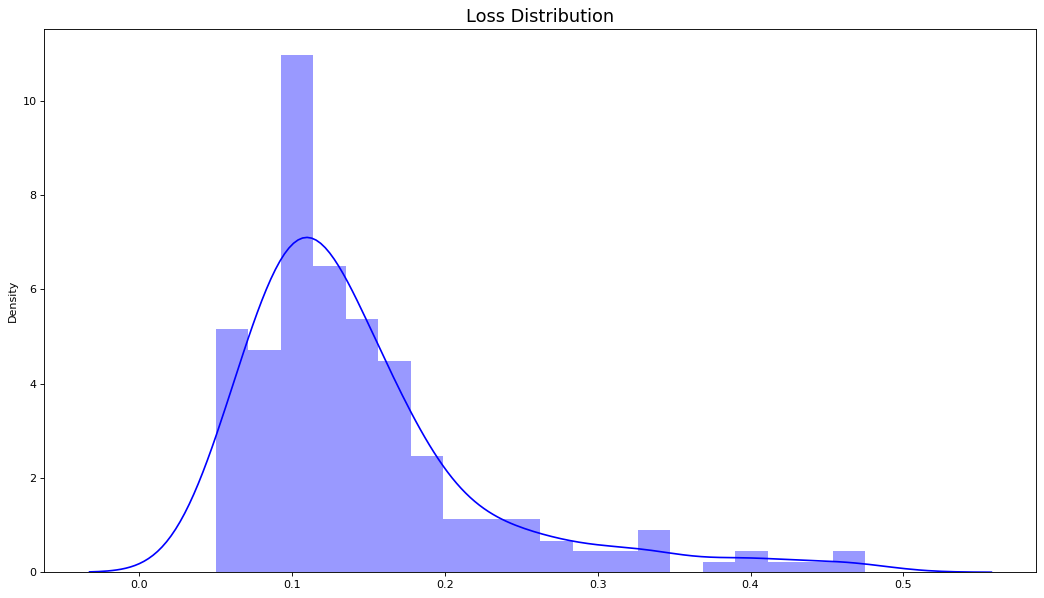

In [169]:
norm_l = mse_loss(X_train)
plt.figure(figsize = (16,9), dpi = 80)
plt.title('Loss Distribution', fontsize = 16)
sns.distplot(norm_l, bins = 20, kde=True, color = 'blue');

In [170]:
Thresh = .2

In [171]:
results(norm_l,Thresh)

normal predictions: 177/210
anomaly predictions: 33/210


/Users/jcervan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


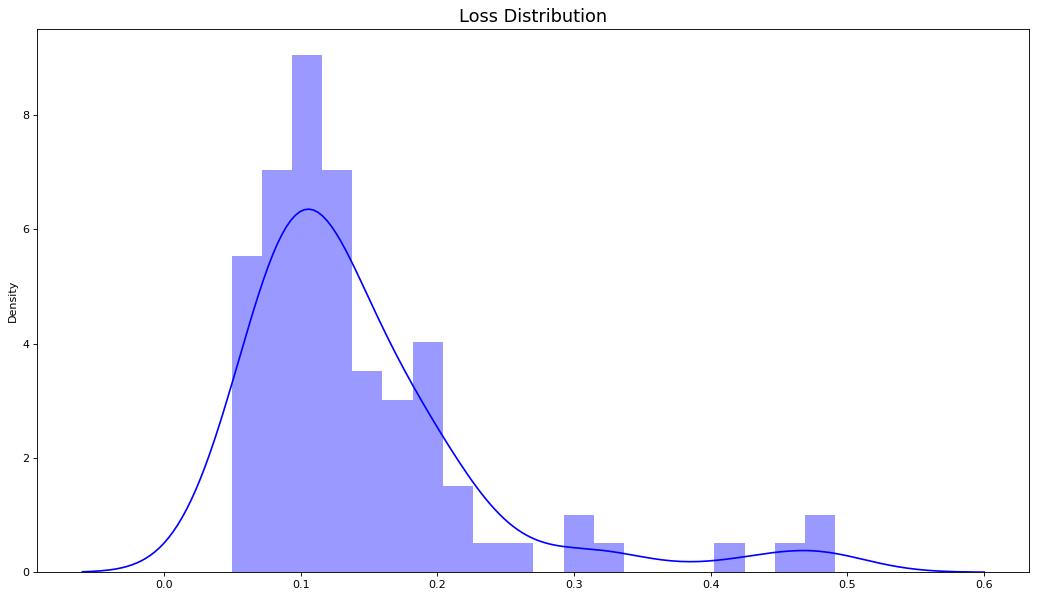

In [172]:
test_l = mse_loss(X_test)
plt.figure(figsize = (16,9), dpi = 80)
plt.title('Loss Distribution', fontsize = 16)
sns.distplot(test_l, bins = 20, kde=True, color = 'blue');

In [173]:
results(test_l,Thresh)

normal predictions: 77/90
anomaly predictions: 13/90


/Users/jcervan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


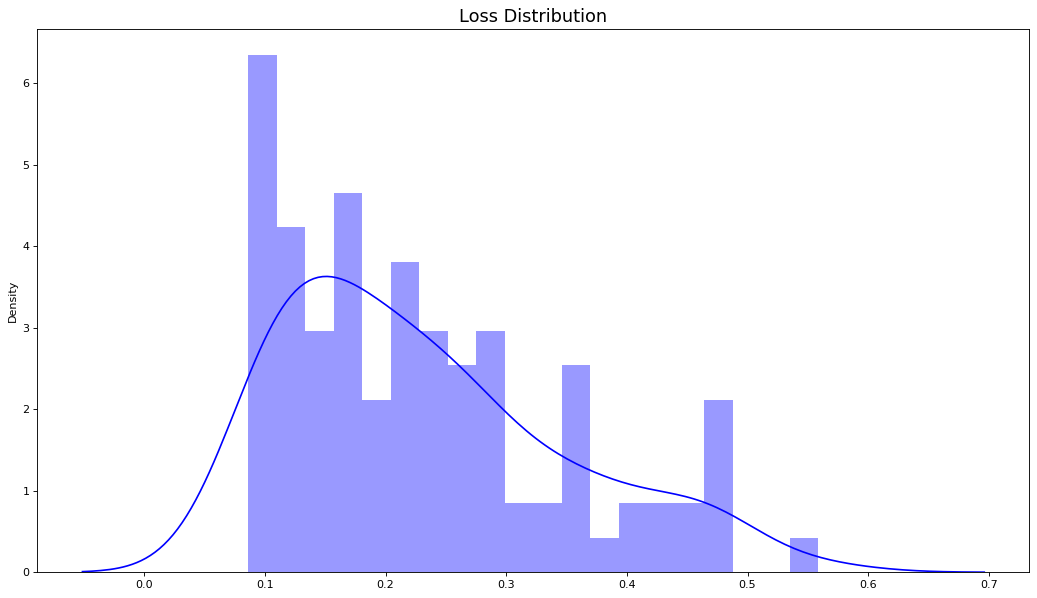

In [174]:
anom_l = mse_loss(X2)
plt.figure(figsize = (16,9), dpi = 80)
plt.title('Loss Distribution', fontsize = 16)
sns.distplot(anom_l, bins = 20, kde=True, color = 'blue');

In [175]:
results(anom_l,Thresh)

normal predictions: 48/100
anomaly predictions: 52/100


/Users/jcervan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


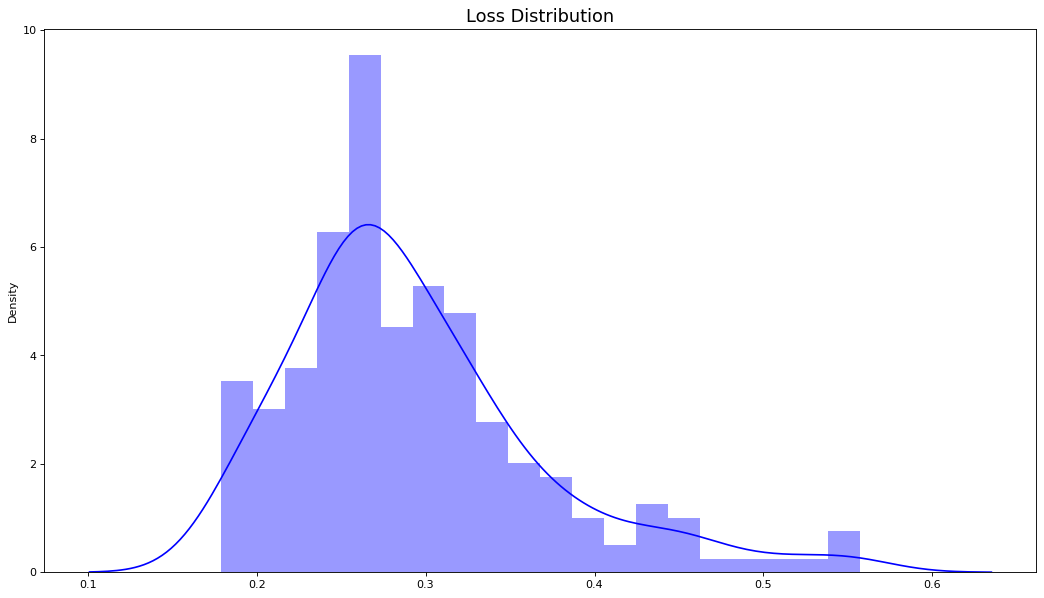

In [157]:
rnorm_l = rmse_loss(X_train)
plt.figure(figsize = (16,9), dpi = 80)
plt.title('Loss Distribution', fontsize = 16)
sns.distplot(rnorm_l, bins = 20, kde=True, color = 'blue');

In [158]:
th = .4

In [159]:
results(rnorm_l, th)

normal predictions: 191/210
anomaly predictions: 19/210


/Users/jcervan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


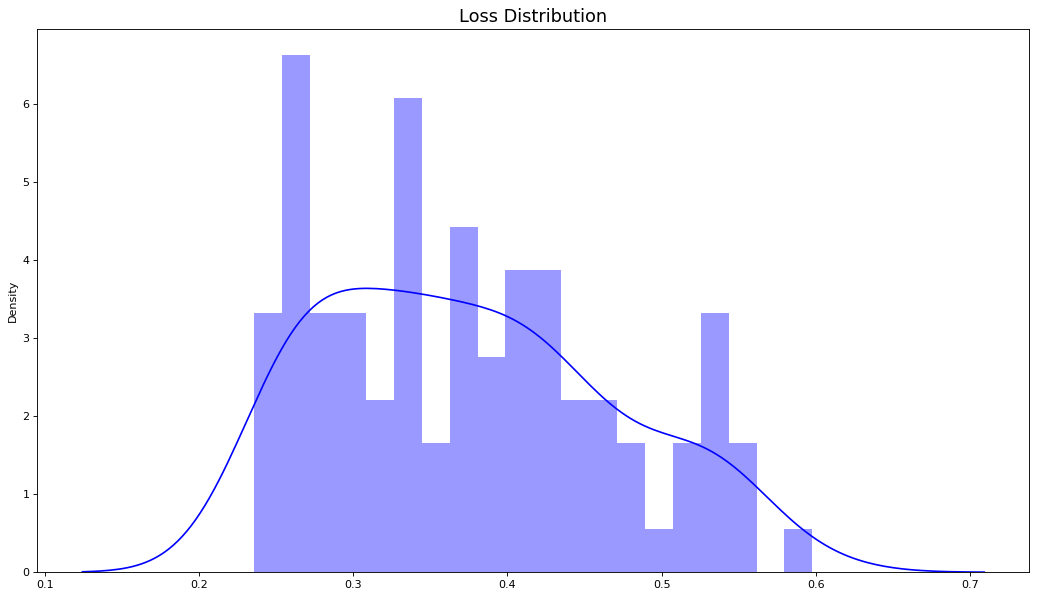

In [160]:
ranom_l = rmse_loss(X2)
plt.figure(figsize = (16,9), dpi = 80)
plt.title('Loss Distribution', fontsize = 16)
sns.distplot(ranom_l, bins = 20, kde=True, color = 'blue');

In [161]:
results(ranom_l, th)

normal predictions: 61/100
anomaly predictions: 39/100
